In [1]:
using Pkg
Pkg.activate("/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis")
using PyPlot
using PyCall
using Base64
using Printf
using NCDatasets
using Statistics
using AvailablePotentialEnergyFramework
using JLD
tkr = pyimport("matplotlib.ticker")# import FormatStrFormatter
np = pyimport("numpy")

 Activating environment at `/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/Project.toml`


PyObject <module 'numpy' from '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/numpy/__init__.py'>

In [2]:
data_dir = "$(ENV["SCRATCH"])/for_postprocessing/largencfiles/"
output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

"/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

In [3]:
function get_snapshot(file; day = 1)
    dayindices(n) = (n*24)
    pres,sp =  Dataset(file) do ds
        pres = variable(ds,"PSFC")[:,:,dayindices(day)] :: Array{Float32,2}
        u = variable(ds,"USFC")[:,:,dayindices(day)] :: Array{Float32,2}
        v = variable(ds,"VSFC")[:,:,dayindices(day)] :: Array{Float32,2}
        sp = hypot.(u,v)
        pres,sp
    end
    return (permutedims(pres),permutedims(sp))
end

get_snapshot (generic function with 1 method)

In [4]:
day = 70
pres_control,sp_control = get_snapshot(joinpath(data_dir,"f5e-4_2km_1000km_control_2d.nc");day)
pres_homoRad,sp_homoRad = get_snapshot(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_2d.nc");day)
pres_homoSfc,sp_homoSfc = get_snapshot(joinpath(data_dir,"f5e-4_2km_1000km_homoSfc_2d.nc");day)
pres_homoAll,sp_homoAll = get_snapshot(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_2d.nc");day)

(Float32[1004.69257 1004.6139 … 1004.8327 1004.65753; 1004.7805 1004.6532 … 1004.77264 1004.842; … ; 1004.5281 1004.5059 … 1004.71826 1004.5366; 1004.591 1004.5016 … 1004.7419 1004.6268], Float32[3.9090314 4.3491497 … 2.769934 3.2467256; 4.0667415 1.9047415 … 1.4871943 4.8624554; … ; 4.317512 5.1820574 … 3.4631984 2.985583; 3.69232 2.988857 … 3.9812028 4.1652074])

In [5]:
PyPlot.matplotlib.rc("font",family="sans-serif", size=24)
cmap = "Blues"

"Blues"

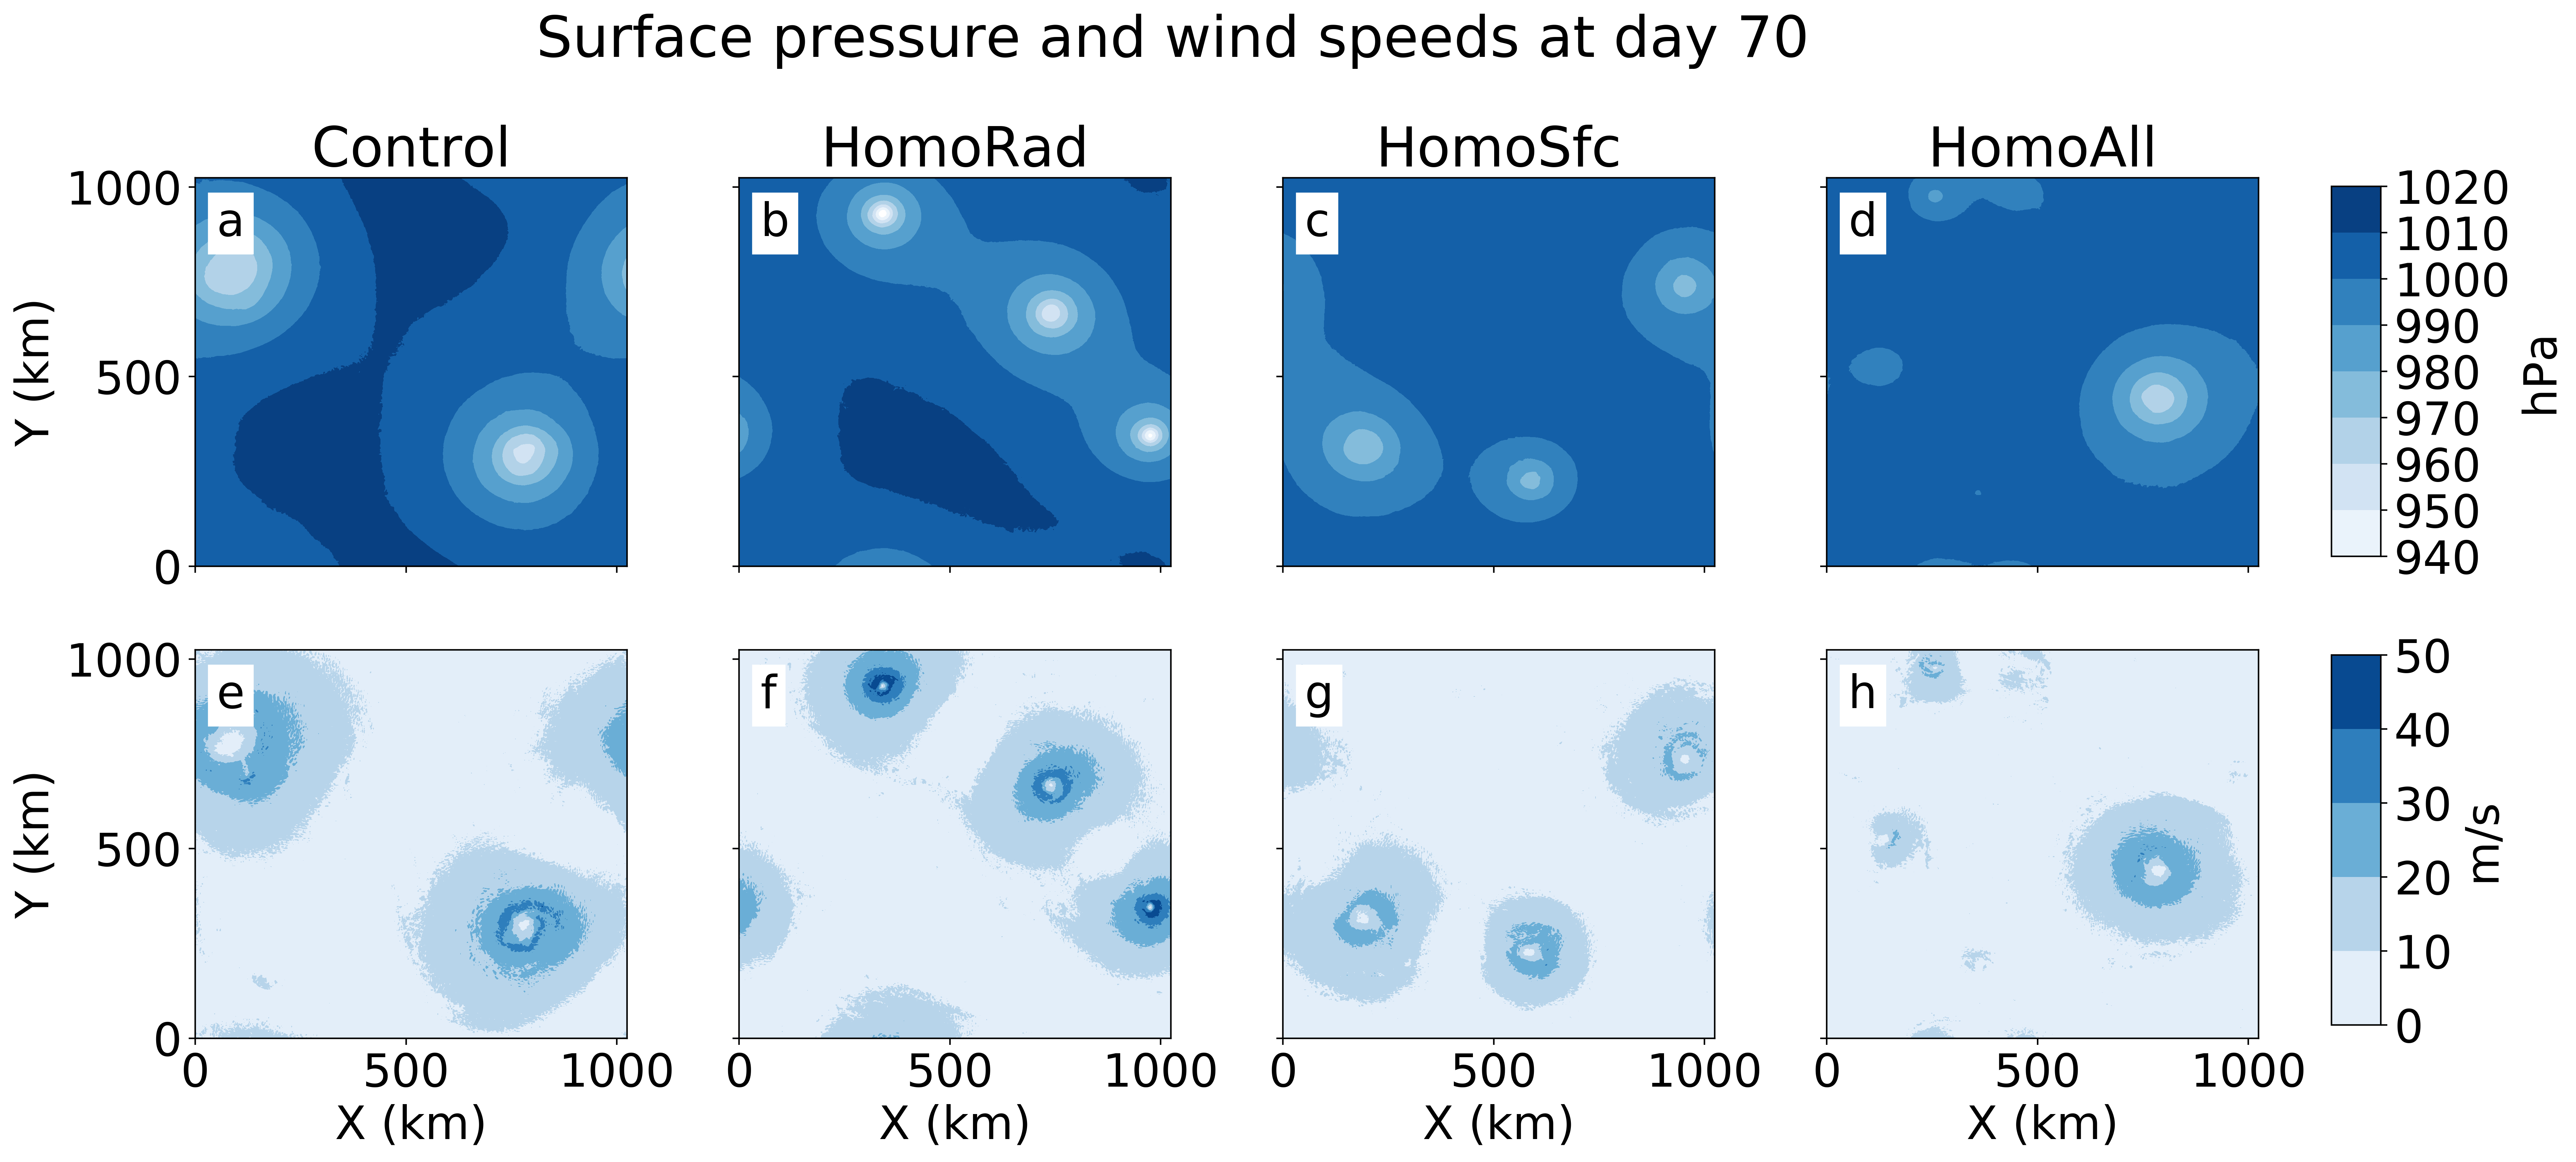

In [14]:
fig, ax = plt.subplots(2,4,sharey=true,sharex=true,figsize=(18,9),dpi=400)
#fig, ax = plt.subplots(2,4,figsize=(1.5*12,1.5*4.8),sharex=true,sharey=true, dpi=400)
timestr = @sprintf "%d" day

PyPlot.xticks(fontsize=24)
PyPlot.yticks(fontsize=24)
levels1=940:10:1025
levels2=940:10:1025
levels3=0:10:50
levels4=0:10:50
x = y =collect(range(0,stop=1024,length=512))

cf1 = [ax[1,1].contourf(x,y,pres_control,levels=levels1,cmap=cmap)]
ax[1,1].set_ylabel("Y (km)")
cf2 = [ax[1,2].contourf(x,y,pres_homoRad,levels=levels1,cmap=cmap)]
cf3 = [ax[1,3].contourf(x,y,pres_homoSfc,levels=levels2,cmap=cmap)]
cf4 = [ax[1,4].contourf(x,y,pres_homoAll,levels=levels2,cmap=cmap)]
ax[2,1].set_ylabel("Y (km)")	
ax[1,1].set_title("Control")
ax[1,2].set_title("HomoRad")
ax[1,3].set_title("HomoSfc")
ax[1,4].set_title("HomoAll")
cf5 = [ax[2,1].contourf(x,y,sp_control,levels=levels3,cmap=cmap)]
cf6 = [ax[2,2].contourf(x,y,sp_homoRad,levels=levels3,cmap=cmap)]
cf7 = [ax[2,3].contourf(x,y,sp_homoSfc,levels=levels4,cmap=cmap)]
cf8 = [ax[2,4].contourf(x,y,sp_homoAll,levels=levels4,cmap=cmap)]
ax[2,1].set_xlabel("X (km)")	
ax[2,2].set_xlabel("X (km)")	
ax[2,3].set_xlabel("X (km)")	
ax[2,4].set_xlabel("X (km)")

ax[1,1].annotate("a", xy=(0.05, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[1,2].annotate("b", xy=(0.05, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[1,3].annotate("c", xy=(0.05, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[1,4].annotate("d", xy=(0.05, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[2,1].annotate("e", xy=(0.05, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[2,2].annotate("f", xy=(0.05, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[2,3].annotate("g", xy=(0.05, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[2,4].annotate("h", xy=(0.05, 0.85), xycoords="axes fraction",backgroundcolor="white")

cb_ax1 = fig.add_axes([0.97, 0.54, 0.02, 0.3])
cbar1 = fig.colorbar(cf1[1], cax=cb_ax1,label="hPa")
cb_ax2 = fig.add_axes([0.97, 0.16, 0.02, 0.3])
cbar2 = fig.colorbar(cf5[1], cax=cb_ax2,label="m/s")
#PyPlot.xlabel("X (km)")
fig.suptitle("Surface pressure and wind speeds at day $timestr",fontsize=30)
fig.tight_layout(rect=[0.01, 0.02, 0.98, 0.93])
#plt.close()

savefig(joinpath(output_dir,"snapshot_2km.png"), bbox_inches="tight")
savefig(joinpath(output_dir,"snapshot_2km.eps"), bbox_inches="tight")
savefig(joinpath(output_dir,"snapshot_2km.pdf"), bbox_inches="tight")